<a href="https://colab.research.google.com/github/mafreitasbarreto/Redes-Complexas/blob/main/Trabalho_Pr%C3%A1tico_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalando o pacote Wikipedia
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=92386027508769b83f804cd22d53a2d977e315694038fb379b57dd6f494200cf
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
#Importando bibliotecas
import wikipedia
import networkx as  nx
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
from numpy.ma.core import argmax

In [ ]:
# Wikipedia em português
wikipedia.set_lang('pt')

In [ ]:
F = nx.DiGraph() #inicia um grafo vazio

raiz = "Copa do mundo"   #Nó selecionado da Wikipedia-pt
w = wikipedia.page(raiz) #Nó inicial raiz/pode ser carregada a página?
wiki = w.links           #Vizinhos da raiz/pode ser carregada a página?
tam = 500                #Numero de nós gerados no Grafo


def gera_grafo(raiz, tam): #Cria um subgrafo N dos vizinhos da raiz e suas conexões
   while len(F.nodes)<2:     #Escolha da Aresta inicial sem erros
    s = list(wiki)  #lista dos vizinhos
    s_cnj = set(s)  #conjunto dos vizinhos
    try:
     m = random.choice(s)
     mk = wikipedia.page(m)
     mv= mk.links
    except:
     continue
    if raiz!= m:
      F.add_edge(raiz,m)
   while len(F.nodes)<tam: #Faça até atingir o número de nós
     try:
       k = wikipedia.page(m) #pode ser carregada a página?
       k_v = k.links
     except:
       m = raiz  # Senão retorna para a raiz
       print('Não pude carregar m', m )
       continue
     k_lst = list(k_v)
     k_cnj = set(k_lst)
     n = list(s_cnj.intersection(k_cnj)) #interseção vizinhos da raiz
     if len(n)>0:
          try:
             j=random.choice(n) #pode ser carregada a página?
             verifica_pagina = wikipedia.page(j)
             verifica_vizinhos = verifica_pagina.links
          except:
             continue
          if (m,j) not in F.edges and m!=j:
            F.add_edge(m,j)
            m = j
          elif j != raiz and raiz in verifica_vizinhos and (j,raiz) not in F.edges: # raiz é vizinho do nó
             F.add_edge(j,raiz)
             m = raiz
          else:
            m=raiz   # Se condições não satisfeitas retorne a raiz
     elif m in s_cnj and m != raiz and raiz in k_v and (m,raiz) not in F.edges: # raiz é vizinho do nó
             F.add_edge(m,raiz)
             m = raiz
     else:
         m=raiz

if len(wiki)<tam:
      print('número de vizinhos inferior ao tamanho')
else:
  gera_grafo(raiz,tam)

print("{} nós, {} arestas".format(F.order(), nx.number_of_edges(F)))
with open("copa.p", 'wb') as f: # salva a rede em um arquivo .p
    pickle.dump(F, f)


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


500 nós, 1346 arestas


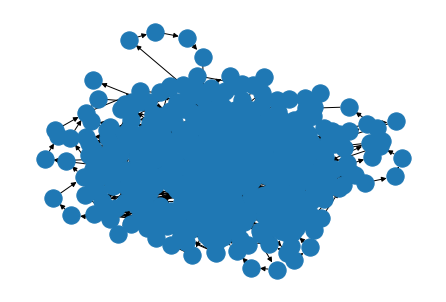

In [ ]:
nx.draw_kamada_kawai(F) # Gráfico em Kamada Kawai

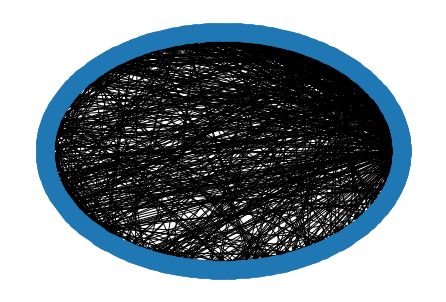

In [ ]:
nx.draw_circular(F) # Grafico circular

In [ ]:
#Nós em F
print(F.nodes)

['Copa do mundo', 'Giorgio Vaccaro', 'Itália', 'Rússia', 'Encyclopædia Britannica', 'Política', 'Burocracia', 'Estado', 'México', 'Base Virtual Internacional de Autoridade', 'Espanha', 'El País', 'Madrid', 'Chile', 'França', 'Organização das Nações Unidas', 'União Soviética', 'África do Sul', 'Língua francesa', 'Marrocos', 'Capital', 'Oceania', 'Ásia', 'Tóquio', 'Lisboa', 'Marselha', 'Bélgica', 'Bruxelas', 'Roma', 'Japão', 'Produto interno bruto', 'Número de controle da Biblioteca do Congresso', 'Gemeinsame Normdatei', 'Áustria', 'Fórmula 1', 'Copa do Mundo FIFA de 2010', 'Lista de finais da Copa do Mundo FIFA', 'Guerra', 'Alemanha Nazi', 'Berlim', 'Amsterdã', 'Vancouver', 'Wikimedia', 'Alemanha', 'Comitê Olímpico Internacional', 'Jogos Olímpicos Intercalados de 1906', 'Suíça', 'Basileia', 'Alemanha Ocidental', 'Santiago (Chile)', 'Paris', 'Barcelona', 'São Paulo', 'Luxemburgo (cidade)', 'Sérvia', 'África', 'Inglaterra', 'População', 'Estados Unidos', 'Jogos Olímpicos de Verão de 1904'

In [ ]:
#Arestas em F
print(F.edges)

[('Copa do mundo', 'Giorgio Vaccaro'), ('Copa do mundo', 'Estádio Olímpico de Berlim'), ('Copa do mundo', 'Copa do Mundo FIFA de 2026'), ('Copa do mundo', 'Copa do Mundo FIFA de 1990'), ('Copa do mundo', 'Seleção Estadunidense de Futebol'), ('Copa do mundo', 'Seleção Americana de Futebol'), ('Copa do mundo', 'Rudolf Kreitlein'), ('Copa do mundo', 'Estádio Hillsborough'), ('Copa do mundo', 'Eliminatórias da Copa do Mundo FIFA de 2022'), ('Copa do mundo', 'Jardim'), ('Copa do mundo', 'Seleção Cubana de Futebol'), ('Copa do mundo', 'Final da Copa do Mundo FIFA de 1974'), ('Copa do mundo', 'Ao vivo'), ('Copa do mundo', 'Sociedade anônima'), ('Copa do mundo', 'Lista de bolas oficiais da Copa do Mundo FIFA'), ('Copa do mundo', 'Eliminatórias da Copa do Mundo FIFA de 1958'), ('Copa do mundo', 'Campeonato Mundial de Biatlo'), ('Copa do mundo', "FIFA Ballon d'Or"), ('Copa do mundo', 'Eliminatórias da Copa do Mundo FIFA de 2014'), ('Copa do mundo', 'Gianluigi Buffon'), ('Copa do mundo', 'União d

In [ ]:
#A seguir métricas globais são aplicadas em F
print('Número de vértices: {:5d}'.format(F.order()))
print('Número de arestas:  {:5d}'.format(len(F.edges)))
print('Densidade:          {:.3f}'.format(nx.density(F)))
print('Agrupamento:        {:.3f}'.format(nx.transitivity(F)))
print('Reciprocidade:      {:.3f}'.format(nx.reciprocity(F)))
print('Comp.médio caminhos {:.3f}'. format(nx.average_shortest_path_length(F)))

Número de vértices:   500
Número de arestas:   1346
Densidade:          0.005
Agrupamento:        0.013
Reciprocidade:      0.051
Comp.médio caminhos 3.941


Número de componentes fortemente conectadas:  125
Componente  0, Tamanho:   1 
Componente  1, Tamanho:   1 
Componente  2, Tamanho:   1 
Componente  3, Tamanho:   1 
Componente  4, Tamanho:   7 
-----------------------
Componente  4:
Diâmetro:              4
Comprimento médio: 2.167
Componente  5, Tamanho:   1 
Componente  6, Tamanho:   1 
Componente  7, Tamanho: 368 
-----------------------
Componente  7:
Diâmetro:             17
Comprimento médio: 5.204
Componente  8, Tamanho:   1 
Componente  9, Tamanho:   1 
Componente 10, Tamanho:   1 
Componente 11, Tamanho:   1 
Componente 12, Tamanho:   1 
Componente 13, Tamanho:   1 
Componente 14, Tamanho:   1 
Componente 15, Tamanho:   1 
Componente 16, Tamanho:   1 
Componente 17, Tamanho:   1 
Componente 18, Tamanho:   1 
Componente 19, Tamanho:   1 
Componente 20, Tamanho:   1 
Componente 21, Tamanho:   1 
Componente 22, Tamanho:   1 
Componente 23, Tamanho:   1 
Componente 24, Tamanho:   1 
Componente 25, Tamanho:   1 
Componente 26, Tam

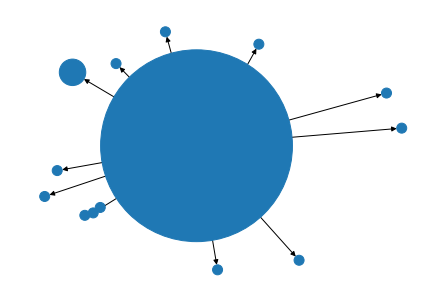

In [ ]:
print('Número de componentes fortemente conectadas: ',
                                  nx.number_strongly_connected_components(F))
comp = nx.strongly_connected_components(F)
comp = list(comp)
g = nx.condensation(F)
plt.close('all')
nodet = [100*len(comp[k]) for k in range(len(comp))]
nx.draw(g,node_size=nodet)
nos = set(F.nodes)
for k in range(len(comp)):
  n = len(comp[k])
  print('Componente {:2d}, Tamanho: {:3d} '.format(k,n))
  if n > 1:
   print('-----------------------')
   print('Componente {:2d}:'.format(k))
   G = F.copy()
   G.remove_nodes_from(nos-set(comp[k]))
   print('Diâmetro:          {:5d}'.format(nx.diameter(G)))
   print('Comprimento médio: {:.3f}'.format(nx.average_shortest_path_length(G)))


In [ ]:
freq = nx.degree_histogram(F) # lista com as frequências de ocorrência
                              # grau 0 , grau 1 , etc .
print(freq)

[0, 9, 232, 5, 106, 6, 54, 3, 19, 4, 9, 2, 7, 3, 5, 5, 5, 2, 3, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
h=list(G.nodes)       #Lista com os nós
caminho=nx.shortest_path(G,h[3],h[10])
longitude=nx.shortest_path_length(G ,h[3] ,h[10])

print("Dist. geodésica (03->10) em G:",longitude)
print("Caminho mais curto (03->10) em G:", caminho)

IndexError: ignored

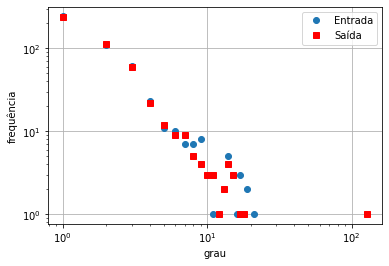

In [ ]:
gri = list(dict(F.in_degree).values())
hin = [gri.count(k) for k in range(max(gri)+1)]
gro = list(dict(F.out_degree).values())
hou = [gro.count(k) for k in range(max(gro)+1)]

plt.close('all')
plt.figure()
plt.loglog(hin,'o',label='Entrada')
plt.loglog(hou,'rs',label='Saída')
plt.ylabel('frequência')
plt.xlabel('grau')
plt.legend()
plt.grid()

In [ ]:
gri = list(dict(F.in_degree).values())
hin = [gri.count(k) for k in range(max(gri)+1)]
gro = list(dict(F.out_degree).values())
hou = [gro.count(k) for k in range(max(gro)+1)]
print(gri)
print(gro)


[6, 1, 3, 1, 5, 10, 5, 2, 10, 7, 3, 23, 8, 11, 15, 9, 5, 3, 2, 23, 3, 3, 4, 10, 9, 2, 10, 13, 2, 1, 8, 14, 9, 15, 6, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 3, 2, 6, 10, 4, 11, 19, 7, 3, 1, 3, 2, 13, 14, 13, 11, 7, 3, 3, 1, 4, 1, 12, 2, 14, 1, 1, 2, 1, 2, 2, 3, 5, 8, 5, 4, 3, 2, 1, 3, 2, 1, 1, 19, 5, 1, 2, 1, 4, 4, 2, 5, 1, 2, 15, 4, 2, 1, 12, 6, 11, 1, 9, 5, 1, 3, 3, 1, 3, 1, 2, 2, 2, 2, 6, 6, 3, 2, 1, 2, 2, 1, 1, 1, 1, 4, 4, 2, 1, 2, 3, 2, 6, 5, 4, 5, 4, 3, 1, 2, 1, 1, 4, 3, 4, 1, 1, 7, 4, 2, 1, 2, 1, 1, 3, 1, 1, 2, 2, 10, 1, 5, 5, 6, 5, 1, 7, 2, 1, 2, 6, 8, 6, 3, 2, 2, 3, 2, 3, 6, 2, 7, 1, 3, 2, 2, 4, 9, 6, 1, 2, 4, 3, 3, 8, 2, 5, 6, 4, 3, 1, 2, 1, 2, 3, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 2, 6, 3, 3, 3, 2, 1, 2, 3, 4, 1, 1, 1, 2, 5, 3, 2, 3, 4, 3, 5, 1, 2, 1, 2, 1, 3, 4, 1, 1, 1, 1, 2, 9, 1, 2, 2, 2, 4, 1, 1, 4, 2, 2, 3, 4, 1, 2, 1, 2, 1, 1, 1, 4, 2, 2, 3, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 3, 3, 3, 1, 2, 1, 4, 1, 1, 1, 2, 1, 6, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1,